# Serialization and Deserialization Dictionaries challenges
Serialization:
> - Useful for persistence and/or transmission of data <br>
> - Generically applies to any object  <br>
> - `Serialization`: creat a presistent representation of the object  <br>
> - `Deserialization`: reconstruct the object from the serialized data  <br>

Pickling:
> It's a python specific built-in mechanism to serialize and deserialize many objects using `binary` representiation 

3'rd party library for serialization: marshmellow

---

## Pickling

> `Serializing` and `deserializing` an object is called `marshalling` <br>
>
> Pickling does serializing and deserializing into binary by default:
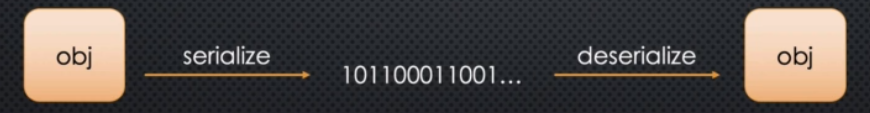
> ### Important!
> Deserializing an object (unpickling) has the potential to execute code. Only deserialize data you trust.
>
> ### Usage:
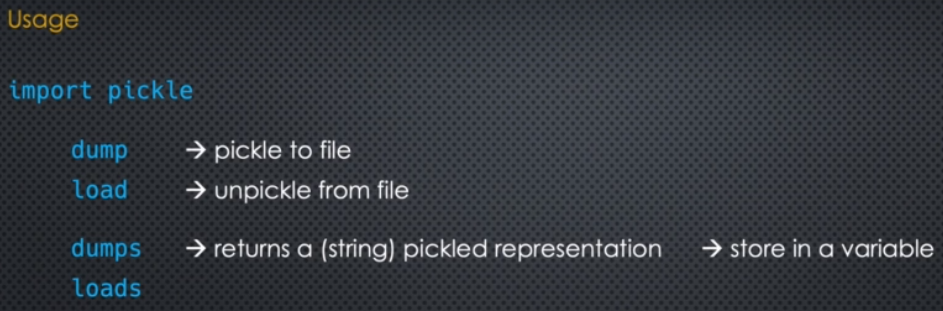
>
> ### Equality and identity:
> Because unpickling will recreate the same object means that dict1 == dict2 however in terms of identity they are not the same object, dict1 is dict2 will result in False.

### Challenge 1

> Pickle and Unpickle a string

Create a program that:
- Serializes the text `Python Pickle Peppers` and assigns it to variable `ser` using pickling. <br>
- Print the ser variable, what do we get? <br>
- Unpicle `ser` in a varialbe called `deser` <br>
- Print deser variable, what do we get? <br>

In [ ]:
# Example

import pickle

ser = pickle.dumps('Python Pickle Peppers')
print(ser)
deser = pickle.loads(ser)
print(deser)

### Challenge 2

> Serialize and deserialize a dictionary

Using dictionary:
```
d = {
    'a': 100,
    'b': [1,2,3],
    'c': (1,2,3)
}
```
- Pickle dictionary `d` and assign it to variable `ser` <br>
- Unpickle the var `ser` and assign it to variable `deser` <br>
- Compare if the two objects are equal and if the two objects are identical.

In [ ]:
# Example
d = {
    'a': 100,
    'b': [1,2,3],
    'c': (1,2,3)
}
ser = pickle.dumps(d)
deser = pickle.loads(ser)

print(d == deser)
print(id(d), id(deser))

### Challenge 3

> Pickle and Unpickle nested dictionaries.

Using dictionaries:
```
d1 = {
    'title': 'my_book_1',
    'items': ['apple','orange']
}

d2 = {
    'title': 'my_book_2',
    'items': [1,2,3]
}

d = {
    'book-titles': d1['title'] + d2['title'],
    'book-content': d1['items'] + d2['items'] 
}
```

- Pickle dictionary `d` and assign it to variable `ser`. <br>
- Unpickle dictionary `ser` and assign it to var `deser`. <br>
- Use pprint to compare the deserialised dictionary `dser` with the original dictionary `d`.

In [ ]:
# Example

d1 = {
    'title': 'my_book_1',
    'items': ['apple','orange']
}

d2 = {
    'title': 'my_book_2',
    'items': [1,2,3]
}

d = {
    'book-titles': d1['title'] + ', ' + d2['title'],
    'book-content': d1['items'] + d2['items'] 
}

ser = pickle.dumps(d)
deser = pickle.loads(ser)

from pprint import pprint
pprint(deser)

---

## JSON Serialization

Supports limited data types by default:
> - strings delimited by double quotes
> - numbers
> - booleans
> - arrays
> - dictionaries
> - empty value null

Difference between JSON and Dictionaries:
> While dictionaries are objects in python, JSON is a string.

Serializing and deserializing:
> 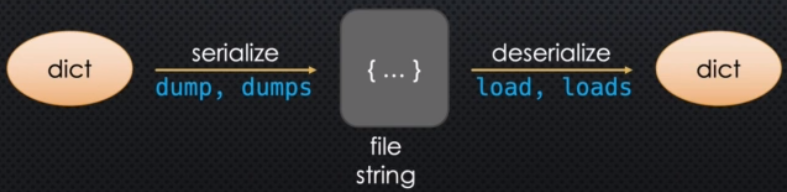

Limitations:
> - JSON must be strings but py dictionary keys need to be hashable which can create a serialization issue? <br>
> - JSON values types are limited while python types can be anything how do we serialize those? <br>
> - If we manage to serialize complex data types how do we deserialize them back to original data type? <br>
> The ansewer is to `customize serialization and deserialization`

### Challenge 1

> Serialize and deserialize a simple object

Using:
```
d1 = {'a': 100, 'b': 200}
```
- Serialize `d1` and assign it to `ser`. <br>
- Check data type of `ser`. <br>

In [ ]:
# Example
import json

d1 = {'a': 100, 'b': 200}

ser = json.dumps(d1)
print(ser)
print(type(ser))

### Challenge 2

> Serialize data with indentation.

Using:
```
d1 = {'a': 100, 'b': 200}
```
- Serialize `d1` and assign it to variable `ser`.
- Add 2 spaces of indentation when serializing. <br>

In [ ]:
# Example

d1 = {'a': 100, 'b': 200}

ser = json.dumps(d1, indent=2)
print(ser)

### Challenge 3

> Serializing integer keys missmatch key type issue

Using:
```
d1 = {1: 100, 2: 200}
```

- Serialize dictionary `d1` and assign it to variable `ser`. <br>
- Deserialize `ser` and assign it to var `deser`. <br>
- Check if `d1` is equal to `deser`.
- Check what data type the keys are for `d1` and `deser`.

In [ ]:
# Example

d1 = {1: 100, 2: 200}

ser = json.dumps(d1)
deser = json.loads(ser)

print(d1 == deser)
print(d1, deser)

# Note! 
# d1 has integer keys while deser has string keys')

### Challenge 4

> JSON data format interpretation in pyton. How different data types, are parsed from JSON to python.

Using:
```
d_jason = """{
    "name": <str>,
    "age": <int>,
    "height": <float>,
    "walksFunny": <bool>,
    "sketches": <iterable with elements>,
    "boring": <a null value>
}"""
```

- Add the correct JSON data types and values to `d_jason` such that when deserialized the data is correctly represented in python. <br>
- Deserialize `d_jason`. <br>
- Compare `d_jason` with the deserialized version.

In [ ]:
# Example
d_jason = """{
    "name": "John Smith",
    "age": 82,
    "height": 1.87,
    "walksFunny": true,
    "sketches": [1,2,3],
    "boring": null
}"""

json.loads(d_jason)

### Challenge 5

> Simplified example of customized implementation of data for JSON serialization for class objects. <br>
This approach is for concept exemplification it's not an ideal robust solution. <br>
By defauld JSON can handle a few basic data types. In order to be able to handle a custom or complex data type outside it's default approach we need to create a custom implementation.

Using class Person:
```
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __repr__(self):
        return f'Person(name={self.name}, age={self.age})'
```
- Implement a method named `toJSON` that will return a JSON ready dictionary.
- Serialize and deserialize an object of type Person.
- What alternative built in function can we use in the `toJSON` method that will return a dictionary with the attributes?

In [ ]:
# Example

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __repr__(self):
        return f'Person(name={self.name}, age={self.age})'

    def toJSON(self):
        return dict(name=self.name, age=self.age)
    

# The alternative solution for toJSON method is `vars`

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __repr__(self):
        return f'Person(name={self.name}, age={self.age})'

    def toJSON(self):
        return vars(self)
    
    
p = Person('John', 82)

json.dumps(p.toJSON())

--- 

## Custom JSON Encoding
> - `dump` and `dumps` fn can provide a custom `callabe` that can overwrite the default JSON encoder. This means that we can use this feature to create a custom way in which to serialize complex objects. This option removes the need to modify our objects to work with JSON as we did above by writing a special class.
> - The `callable` allowed by JSON has to have a `single argument` and that is the object Python can't serialize.

### Challenge 1

> Simple custom encoding with datetime object

Using dictionary:
```
log_record = {'time': datetime.utcnow(),
              'message': 'testing'}
```

- Create a function aka `callable` named `format_iso` that takes in a datetime object _(as in log_record)_ and returns a string with the ISO-8601 format.
- Serialize `log_record` and check the output.

In [ ]:
# Example

import json
from datetime import datetime

log_record = {'time': datetime.utcnow(),
              'message': 'testing'}

def format_iso(dt):
    """ This function will reporduce the ISO-8601 format.
    The ISO-8601 format is 'YYYY-MM-DDTHH:MM:SS' and can have additional
    seconds or timezone params in the format
    """
    # ISO-8601 format is 'YYYY-MM-DDTHH:MM:SS' and can have additional
    # seconds or timezone params in the format
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

json.dumps(log_record, default=format_iso)

### Challenge 2

> Custom encoding for multiple data types using singldispatch


Using object Person and dict d:
```
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def __repr__(self):
        return f'Person(name={self.name}, age={self.age}'
    
    def toJSON(self):
        return vars(self)
        
john = Person('John',28)

d = {
    'message': 'this is great',
    'date': datetime.utcnow(),
    'person': john,
    'set': {1,2,3}
}

```

> Create a general function called `json_format` that takes an argument `arg` and:
> - Tries to call a `toJSON` method on the object, if that fails <br>
> - Tries to return a dictionary of attributes, if that fails <br>
> - Tries to return a string of the object.

> Register a `datetime` and a `set` objects to `json_format` fn. <br>
> Serialize dictionary `d`. <br>

In [ ]:
d = {
    'message': 'this is great',
    'date': datetime.utcnow(),
    'person': john,
    'set': {1,2,3}
}

In [9]:
# Example
from functools import singledispatch


class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f'Person(name={self.name}, age={self.age}'

    def toJSON(self):
        return vars(self)

john = Person('John',28)

# Create dictionary with custom format
d = {
    'message': 'this is great',
    'date': datetime.utcnow(),
    'person': john,
    'set': {1,2,3}
}


# Create main function
@singledispatch
def json_format(arg):
    try:
        return arg.toJSON()
    except AttributeError:
        try:
            return vars(args)
        except TypeError:
            return str(arg)


# Register datetime
@json_format.register(datetime)
def _(arg):
    return arg.isoformat()


# Register set
@json_format.register(set)
def _(arg):
    return list(arg)


# Serialize dict with custom objects
ser = json.dumps(d, indent=2, default=json_format)
print(ser)

{
  "message": "this is great",
  "date": "2022-02-23T09:57:06.621466",
  "person": {
    "name": "John",
    "age": 28
  },
  "set": [
    1,
    2,
    3
  ]
}


---

## JSONEncoder
Args for JSONEncoder `dump` & `dumps`:
> - `skypkeys`: skip dict keys when not hashable
> - `separator`: use a default separator
> - `indent`: use space indentation for readability
> - `sort_keys`: True/False arg that sorts dictionary by keys
> - `cls`: uses a custom class to define encoding behavior.

JSONEncoder Class:
> - Used in order to keep encoding consistent across multiple instances. The idea is to create a custom class encoder containing all the parameters needed such that it can be used all over code and changed in one single place.
> - The custom class can take the same arguments as `dumps`

### Challenge 1

> Create a simple JSONEncoder

- Create a `JSONEncoder` instance named `default_encoder`. <br>
- Encode a tuple with 3 integers.

In [10]:
# Example

default_encoder = json.JSONEncoder()

default_encoder.encode((1, 2, 3))

'[1, 2, 3]'

### Challenge 2

> Create a custom JSONEncoder and implement datetime serialization capability.

- Create a class named `CustomJSONEncoder` that inherits from a parent class of json `JSONEncoder`. <br>
- The new class takes in an argument `arg` and converts a datetime object in a string ISO-8601 compatible format  ready to be serialized. <br>
- If object is not of type `datetime` then delegates the encoding to the parent class. <br>
- Create an `custom_encoder` a object. <br>
- Encode a `datetime` object and print the results. <br>
- Serialize `d = dict(name='test', time=datetime.utcnow())` using the `CustomJSONEncoder`.

In [15]:
# Example
from datetime import datetime


class CustomJSONEncoder(json.JSONEncoder):
    def default(self, arg):
        if isinstance(arg, datetime):
            return arg.isoformat()
        else:
            # Delegates the responsibility to the parent class
            super().default(arg)


# Test CustomJSONEncoder
custom_encoder = CustomJSONEncoder()
res = custom_encoder.encode(datetime.utcnow())
print('testing custom encoder', res)

# Use CustomJSONEncoder class
d = dict(name='test', time=datetime.utcnow())

json.dumps(d, cls=CustomJSONEncoder)

testing custom encoder "2022-02-23T10:21:07.114200"


'{"name": "test", "time": "2022-02-23T10:21:07.114699"}'

### Challenge 3

> Handle non-hashable keys when serializing

Using dictionary:
```
d = {10:"int", 10.5:"float", (1, 1): "tuple"}
```
- Serialize dict `d` ignoring the tuple key

In [17]:
# Example

d = {10: "int", 10.5: "float", (1, 1): "tuple"}

json.dumps(d, skipkeys=True)

'{"10": "int", "10.5": "float"}'

### Challenge 4

> Using custom serparator for serializing dictionary

Using dictionary:
```
d = {
    'name': 'Python',
    'age': 27,
    'created_by': 'Guido van Rossum',
    'list': [1, 2, 3]
}
```
- Serialize dictionary `d` such that the dictionary elements are separated by `;` and the key-value pairs are separeted by `=`.

In [26]:
# Example

d = {
    'name': 'Python',
    'age': 27,
    'created_by': 'Guido van Rossum',
    'list': [1, 2, 3]
}

ser = json.dumps(d, indent=2, separators=(';', ' = '))

print(ser)

{
  "name" = "Python";
  "age" = 27;
  "created_by" = "Guido van Rossum";
  "list" = [
    1;
    2;
    3
  ]
}


### Challenge 5

> Create a custom encoder class that has hardcoded params. We would use such an approach if we wanted to create a standard of encoding for our program.

Using dict:
```
d = {
    'time': datetime.utcnow(),
    1+1j: "complex",
    'name': 'Python'
}
```
- Create a class named `CustomEncoder` that inherits from partent class. <br>
- In the constructor Overwrite the parent class attributes with following values: <br>
```
skipkeys=True,
allow_nan=False,
indent='---',
separators=('', ' = ')
```
- Overwrite the `default` method to return a string iso-8601 format from a datetime object. <br>
- Serialize and print the `d` dictionary. <br>
- How can we modify this class to allow `dumps` to pass any arguments to our custom class?

In [28]:
# Example

class CustomEncoder(json.JSONEncoder):
    # to allow any arguments to pass from dumps to
    # our custom class we need to implement args and kwargs
    def __init__(self, *args, **kwargs):
        super().__init__(
            # Retrieve the values passed to dumps example.
            #  skipkeys=kwargs['skipkeys']
            skipkeys=True,
            allow_nan=False,
            indent='---',
            separators=('', ' = ')
        )

    def default(self, arg):
        if isinstance(arg, datetime):
            return arg.isoformat()
        else:
            return super().default(arg)


d = {
    'time': datetime.utcnow(),
    1+1j: "complex",
    'name': 'Python'
}

print(json.dumps(d, cls=CustomEncoder))

{
---"time" = "2022-02-23T10:59:56.539428"
---"name" = "Python"
}


---

## JSON Decoding
> - When decodig a serialized object we can make use of the `object_hook` parameter which takes a function as a callable. The `object_hook` it recursively replacing any dictionary, (root or sub-dict) with a new dictionary. This approach is meant to allow us to change data types recursively troughout the JSON unknown number of levels.

> - When deserializing an object there is a "contract" aka we need to have knowledge about how the object is serialized (what data types are used) in the first place to help us with the reverse process. This "contract" is called a `schema`. Schemas can be for entire JSON or parts of JSON object.

> - We can overwrite how specific data types are interpreted when decoding by using `parse_float, parse_int and parse_constant` parameters in the load function.

> - While `object_hook` takes a deserialized dictionary as input `{"a": 1, "b":2}`, the `object_pairs_hook` takes as input a list of tuples `[("a",1), ("b",2)]`. The reason is that before python 3.6 the order of the dictionary was not preserved so this approach was a workaround for that.

### Challenge 1

> Decoding a simple example.

Using json:
```
j = '''
{
    "name": "Python",
    "age": 27,
    "versions": ["2.x", "3.x"]
}
'''
```
- Deserialized the JSON object `j`

In [3]:
# Example

j = '''
{
    "name": "Python",
    "age": 27,
    "versions": ["2.x", "3.x"]
}
'''

# All data types are loaded correctly
json.loads(j)

{'name': 'Python', 'age': 27, 'versions': ['2.x', '3.x']}

### Challenge 2

> Deserialize a custom datetime object with making use of the `schema`. <br>Note! We are manually deserializing the object to understand how schemas are useful and why we need a `contract` between serializing and desserializing objects.

Using JSON:
```
p = '''
    {
        "time": {
            "objecttype": "datetime",
            "value": "2018-10-21T09:14:15"
            },
        "message": "created this json string"
    }
'''
```
- Deserialize json object `p` into a dictionary `d`
- Create a simple for loop structure that takes the deserialized object `d` and use JSON schema and replaces the datetime string in `value` to a datetime object. <br>
- Note! The content of `time dict` should be replaced with the datetime object.

In [15]:
# Example
from datetime import datetime

p = '''
    {
        "time": {
            "objecttype": "datetime",
            "value": "2018-10-21T09:14:15"
            },
        "message": "created this json string"
    }
'''

d = json.loads(p)

for key, value in d.items():
    if (isinstance(value, dict) and
        'objecttype' in value and
        value['objecttype'] == 'datetime'
       ):
        d[key] = datetime.strptime(value['value'], '%Y-%m-%dT%H:%M:%S')
# Replace the 'time' schema with a datetime object
print(d)

{'time': datetime.datetime(2018, 10, 21, 9, 14, 15), 'message': 'created this json string'}


### Challenge 3

> Looking at how the `object_hook` works.<br>


Using JSON object:
```
j = '''
    {
        "a": 1,
        "b": 2, 
        "c": {
            "c.1": 1,
            "c.2": 2,
            "c.3": {
                "c.3.1": 1,
                "c.3.2": 2
            }
        }
    }
'''
```
- Createa a function named `custom_decoder`, that takes a json object as an argument, does `print('decoding: ', arg)` and returns arg.
- Decode the json object `j` using the `custom_decode` function.

In [5]:
# Example

# Notes!
# The `object_hook` takes a `callable`, iterates over each level
# of the json object (aka each dictionary) and applies the `callable`.

j = '''
    {
        "a": 1,
        "b": 2, 
        "c": {
            "c.1": 1,
            "c.2": 2,
            "c.3": {
                "c.3.1": 1,
                "c.3.2": 2
            }
        }
    }
'''


def custom_decoder(arg):
    print('decoding: ',arg)
    return arg


json.loads(j, object_hook=custom_decoder)

decoding:  {'c.3.1': 1, 'c.3.2': 2}
decoding:  {'c.1': 1, 'c.2': 2, 'c.3': {'c.3.1': 1, 'c.3.2': 2}}
decoding:  {'a': 1, 'b': 2, 'c': {'c.1': 1, 'c.2': 2, 'c.3': {'c.3.1': 1, 'c.3.2': 2}}}


{'a': 1, 'b': 2, 'c': {'c.1': 1, 'c.2': 2, 'c.3': {'c.3.1': 1, 'c.3.2': 2}}}

### Challenge 4

> Decoding a JSON object using the `object_hook` and a callable.


Using json:
```
j = '''
    {
        "time": {
            "objecttype": "datetime",
            "value": "2018-10-21T09:14:15"
            },
        "message": "created this json string"
    }
'''
```

- Create a function named `custom_decoder` that takes a json object as input.
- Verifies the schema of the json input: if there is an `objecttype` of type `datetime`
- Returns a `datetime` object if found else return the argument unmodified.
- Decode the json object `j` using the `custom_decoder`
- Explain how the `object_hook` works.

In [13]:
# Example

# Note! object_hook takes as input a callable, iterates over each level
# of the json object (aka each dictionary) and parses the dict to the callable

j = '''
    {
        "time": {
            "objecttype": "datetime",
            "value": "2018-10-21T09:14:15"
            },
        "message": "created this json string"
    }
'''


def custom_decoder(arg):
    if 'objecttype' in arg and arg['objecttype'] == 'datetime':
        return datetime.strptime(arg['value'], '%Y-%m-%dT%H:%M:%S')
    else:
        return arg


json.loads(j, object_hook=custom_decoder)

{'time': datetime.datetime(2018, 10, 21, 9, 14, 15),
 'message': 'created this json string'}

### Challenge n

> Decode a json file and overwrite a json (built-in) float type with a custom decimal type.

Using json:
```
j = '''
{
    "a":100,
    "b":0.2,
    "c":0.5
}
```

- Create a function named `make_decimal` that takes as argument a json object.
- Decode json object `j` and replace all `float` data types with a `decimal` data type.


In [17]:
# Example
from decimal import Decimal

j = '''
{
    "a": 100,
    "b": 0.2,
    "c": 0.5
}
'''


def make_decimal(arg):
    print('Recieved: ', type(arg), arg)
    return Decimal(arg)


json.loads(j, parse_float=make_decimal)

Recieved:  <class 'str'> 0.2
Recieved:  <class 'str'> 0.5


{'a': 100, 'b': Decimal('0.2'), 'c': Decimal('0.5')}

---

## JSONDecoder
How it works:
> - inherit from JSONDecoder
> - override the decode function
> - decode function receives the entire JSON string
> - we have to fully parese and return whatever object we want

### Challenge 1

> A quick example of how is the json object parsed. The key takaway here is that the json object is passed entirely to the decoder not just bits and pieces that does not know how to decode like with Encoder.

Using json object:
```
j = '''
    {
        "a": 100,
        "b": [1, 2, 3],
        "c": "python",
        "d": {
            "e": 4,
            "f": 5.5
        }
    }
'''
```

- Create a decoder class names `CustomDecoder` that inherits from `json.JSONDecoder` that contains a single method called `decode`.
- The `decode` method takes in an additional argument named `arg`, performs `print("decode:", type(arg), arg)` and returns the string `"a simple string object"`
- Decode json object `j` and examine the output, what do you get?

In [8]:
# Example
j = '''
    {
        "a": 100,
        "b": [1, 2, 3],
        "c": "python",
        "d": {
            "e": 4,
            "f": 5.5
        }
    }
'''


class CustomDecoder(json.JSONDecoder):
    def decode(self, arg):
        print("decode json object:", type(arg), arg)
        return "a simple string object"
    
    
res = json.loads(j, cls=CustomDecoder)
print('Decoded arg is:', res)

# Note! Because the json decoder parses the entire json object not just
# parts that does not know how to decode the argument is entirely replaced
# by the string

decode json object: <class 'str'> 
    {
        "a": 100,
        "b": [1, 2, 3],
        "c": "python",
        "d": {
            "e": 4,
            "f": 5.5
        }
    }

Decoded arg is: a simple string object


### Note! Custom decoding with `JSONDecoder` is highly specialized training for API's and not in my current scope... to be reviewed at a relevant time.

---

## JSON Schemas
JSON Schema standard: https://json-schema.org/

### Challenge 1

> Simple example on how to create a schema for type object.

- Create a json schema named `person_schema` that will contain:
> - `type` of schema is `object`
> - Has `properties`:
>> - `firstName`: contains `type` `string`
>> - `middleInitial`: contains `type` `string`
>> - `lastName`: contains `type` `string`
>> - `age`: contains `type` `number`

In [ ]:
# Example
person_schema = {
    "type": "object",
    "properties": {
        "firstName": {"type": "string"},
        "middleInitial": {"type": "string"},
        "lastName": {"type": "string"},
        "age": {"type": "number"}
    }
}

### Challenge 2

> Create a schema that accounts for constraints.

- Copy the `person_schema` from above and add the following constraints:
> - `firstName` has to have the minimum length of 1
> - `middleInitial` has the min length of 1 and max lengt to be 1
> - `lastName` has the min length of 1
> - `age` has the min value of 0
- Add a list of `required` elements (firstName & lastName), these elements are a must or the schema can't be validated.

In [9]:
# Example

person_schema = {
    "type": "object",
    "properties": {
        "firstName": {
            "type": "string",
            "minLength": 1
        },
        "middleInitial": {
            "type": "string",
            "minLength": 1,
            "maxLength": 1
        },
        "lastName": {
            "type": "string",
            "minLength": 1
        },
        "age": {
            "type": "integer", 
            "minimum": 0
        }
    },
    "required": ["firstName", "lastName"]
}

### Challenge 3

> Create a schema that only allows values from a predefined domain.

- Copy the `person_schema` from above.
- Add a new property named `eyeColor` with type string.
> - Add a list of eye colors as predefined values with key named `enum`

In [10]:
# Example

person_schema = {
    "type": "object",
    "properties": {
        "firstName": {
            "type": "string",
            "minLength": 1
        },
        "middleInitial": {
            "type": "string",
            "minLength": 1,
            "maxLength": 1
        },
        "lastName": {
            "type": "string",
            "minLength": 1
        },
        "age": {
            "type": "integer", 
            "minimum": 0
        },
        # adding eyecolor
        "eyeColor": {
            "type": "string",
            # predefined list
            "enum": ["amber", "blue", "brown", "gray", 
                     "green", "hazel", "red", "violet"]
        }
    },
    "required": ["firstName", "lastName"]
}

### Challenge 4

> Validate json objects against json schemas using `jsonschema`. The `validate` function provides the first error encountered and it will not provide all errors encountered.

With json object `p1`:
```
p1 = '''
    {
        "firstName": "John",
        "middleInitial": "M",
        "lastName": "Cleese",
        "age": 79
    }
'''

p2 = '''
    {
        "firstName": "John",
        "middleInitial": 100,
        "lastName": "Cleese",
        "age": "Unknown"
    }
'''
```

- import validate from json schema
- import ValidationError from jsonschema.exceptions
- import loads, dumps and JSONDecodeError from json <br>
<br>
- Validate `p1` and `p2` json objects against `person_schema` using `validate` and `try except` statements.
> - trap validation errors and print `Invalid JSON: <exception>`
> - trap decoder error and print `Invalid JSON: {ex}`
> - Else print `JSON is valid and conforms with schema`
<br>
- Test the code with `p1` and `p2` json objects against the 

In [17]:
# Example

from jsonschema import validate
from jsonschema.exceptions import ValidationError
from json import loads, dumps, JSONDecodeError


p1 = '''
    {
        "firstName": "John",
        "middleInitial": "M",
        "lastName": "Cleese",
        "age": 79
    }
'''
# age and middleInitial values are incorrect by design
p2 = '''
    {
        "firstName": "John",
        "middleInitial": 100,
        "lastName": "Cleese",
        "age": "Unknown"
    }
'''

json_doc = p2
print(json_doc)

try:
    validate(loads(json_doc), person_schema)
except JSONDecodeError as ex:
    print(f'Invalid JSON: {ex}')
except ValidationError as ex:
    print(f'Validation error : {ex}')
else:
    print('JSON is valid and conforms with schema')


    {
        "firstName": "John",
        "middleInitial": 100,
        "lastName": "Cleese",
        "age": "Unknown"
    }

Validation error : 100 is not of type 'string'

Failed validating 'type' in schema['properties']['middleInitial']:
    {'maxLength': 1, 'minLength': 1, 'type': 'string'}

On instance['middleInitial']:
    100


### Challenge 5

> Validate json objects against json schemas using jsonschema and Draft4Validator. This approach will allow identifying all the issues present in the json object in one go.

- Import Draft4Validator from jsonshcema
- Instantiate validator with `person_schema` and assign it to `validator`
- Using json object `p2` created above iterate over all errors and print them on the screen. Note! be careful on what is the imput for the object we are looping on.

In [24]:
# Example
from jsonschema import Draft4Validator

validator = Draft4Validator(person_schema)

json_docs = p2
for error in validator.iter_errors(loads(json_docs)):
    print(error, end='\n--------------------------\n')

100 is not of type 'string'

Failed validating 'type' in schema['properties']['middleInitial']:
    {'maxLength': 1, 'minLength': 1, 'type': 'string'}

On instance['middleInitial']:
    100
--------------------------
'Unknown' is not of type 'integer'

Failed validating 'type' in schema['properties']['age']:
    {'minimum': 0, 'type': 'integer'}

On instance['age']:
    'Unknown'
--------------------------


---

## Marshmallow Library
Documentation: https://marshmallow.readthedocs.io/en/3.0/

### Challenge 1

> Simple serialization using marshmallow.

Using object Person:
```
class Person:
    def __init__(self, first_name, last_name, dob):
        self.first_name = first_name
        self.last_name = last_name
        self.dob = dob

    def __repr__(self):
        return f'Person({self.first_name}, {self.last_name}, {self.dob})'
```
- Import data from datetime
- import Schema and fields form marshmallow
- Create an instance of person named `p1`
- Define a class named `PersonSchema` that inherits from marshmallow `Schema` with:
> - first_name, last_name, dob : where first two are strings and the last one is date using marshmallow `fields`
- Instantiate `PersonSchema` and assign it to `person_schema`
- Serialize the object `p1`. Hint: use the dump method available on the `Schema` class.
- What are the data types for the `p1` object and the data resulted from serializatio?
- What happens if we use dumps instead of dump?

In [29]:
# Example
from datetime import date
from marshmallow import Schema, fields


class Person:
    def __init__(self, first_name, last_name, dob):
        self.first_name = first_name
        self.last_name = last_name
        self.dob = dob

    def __repr__(self):
        return f'Person({self.first_name}, {self.last_name}, {self.dob})'


p1 = Person('John', 'Smith', date(1939, 10, 27))


class PersonSchema(Schema):
    first_name = fields.Str()
    last_name = fields.Str()
    dob = fields.Date()


person_schema = PersonSchema()
data = person_schema.dump(p1) # converts to dict whild dumps converts to str
print(type(data), data)
print(type(p1), p1)

<class 'dict'> {'first_name': 'John', 'dob': '1939-10-27', 'last_name': 'Smith'}
<class '__main__.Person'> Person(John, Smith, 1939-10-27)


### Challenge 2

> Serialize with marshmallow including only specific fields

- Using the `PersonSchema` class defined above, create a new instance named `person_partial` and specifically include only `first_name` and `last_name` when serializing.
- Serialize into a string object `p1`.
- Check the output, what fields are missing?
- Are the missing fields available to be used?

In [31]:
# Example 

person_partial = PersonSchema(only=('first_name', 'last_name'))
person_partial.dumps(p1)
# Missing fields are: dob and age
# The fields are avaialble to be used but were not included.

'{"first_name": "John", "last_name": "Smith"}'

### Challenge 3

> Serialize with marshmallow excluding specific fields

- Using the `PersonSchema` class defined above, create a new instance named `person_partial2` and specifically exclud `dob` when serializing.
- Serialize into a string object `p1`.
- Check the output, what fields are missing?

In [33]:
# Example

person_partial = PersonSchema(exclude=['dob'])
person_partial.dumps(p1)

'{"first_name": "John", "last_name": "Smith"}'

### Challenge 4

> Deserializing a dictionary using marshmallow

Using the PersonSchema instance person_schema:
```
class PersonSchema(Schema):
    first_name = fields.Str()
    last_name = fields.Str()
    dob = fields.Date()
    height = fields.Int()
  
person_schema = PersonSchema()
```

- Create and deserialize a dictionary containing:
> - first_name='John'
> - last_name='Cleese'
> - dob='1939-10-27'
> - height=178
- Check what is the data type for dob.

In [39]:
# Example

class PersonSchema(Schema):
    first_name = fields.Str()
    last_name = fields.Str()
    dob = fields.Date()
    height = fields.Int()


person_schema = PersonSchema()

person_schema.load(dict(
    first_name='John',
    last_name='Cleese',
    dob='1939-10-27',
    height=178
))

{'height': 178,
 'first_name': 'John',
 'dob': datetime.date(1939, 10, 27),
 'last_name': 'Cleese'}

### Challenge 5

> Deserialize a dictionary object with marshmallow indicating the data type of the output. <br> In this exercise instead of outputing a dictionary we want to have an objec of type `Person`.

- We need to modify PersonSchema class if we are to change the output type.
- import post_load decorator from marshmallow. <br>

Starting with:
```
class Person:
    def __init__(self, first_name, last_name, dob):
        self.first_name = first_name
        self.last_name = last_name
        self.dob = dob

    def __repr__(self):
        return f'Person({self.first_name}, {self.last_name}, {self.dob})'

class PersonSchema(Schema):
    first_name = fields.Str()
    last_name = fields.Str()
    dob = fields.Date()
    height = fields.Int()
```

- create a method named `make_person` that takes as input an additional arg `data` and returns an instance `Person` object using `data`.
- decorate the `make_person` method with `post_load` that lets `PersonSchema` instance know that the `data` field will be used to create a `Person` instance.

In [56]:
# Example
from marshmallow import post_load


class Person:
    def __init__(self, first_name, last_name, dob, height):
        self.first_name = first_name
        self.last_name = last_name
        self.dob = dob
        self.height = height

    def __repr__(self):
        return f'Person({self.first_name}, {self.last_name}, {self.dob}, {self.height})'


class PersonSchema(Schema):
    first_name = fields.Str()
    last_name = fields.Str()
    dob = fields.Date()
    height = fields.Int()

    @post_load
    def make_person(self, data, **kwargs):
        return Person(**data)


person_schema = PersonSchema()

person_schema.load(dict(
    first_name='John',
    last_name='Cleese',
    dob='1939-10-27',
    height=178
))

Person(John, Cleese, 1939-10-27, 178)

---

## PyYaml
> Serializing and deserializing Yaml files. <br>
> Commonly used in conjunction with Marshmallow. <br>
> Works using pickle. <br>

Documentation: https://pyyaml.org/wiki/PyYAMLDocumentation

### Challenge 1

> Simple deserialization using yaml.

Using `data` yaml format:
```
data = '''
---
title: Parrot Sketch
year: 1989
actors:
    - first_name: John
      last_name: Cleese
      dob: 1939-10-27
    - first_name: Michael
      last_name: Palin
      dob: 1943-05-05
'''
```

- Deserialize `data` into a variable `d`.
- Check data type, what data format is the output?
- What did yaml make use of to transform the data, such that we have data in the right format?

In [5]:
# Example
import yaml

data = '''
---
title: Parrot Sketch
year: 1989
actors:
    - first_name: John
      last_name: Cleese
      dob: 1939-10-27
    - first_name: Michael
      last_name: Palin
      dob: 1943-05-05
'''

d = yaml.load(data, Loader=yaml.Loader)
d

# Note!: The output data is a dictionary compared to a string (input)
# yaml uses pickling which automatically detects and converts most 
# python data types

{'title': 'Parrot Sketch',
 'year': 1989,
 'actors': [{'first_name': 'John',
   'last_name': 'Cleese',
   'dob': datetime.date(1939, 10, 27)},
  {'first_name': 'Michael',
   'last_name': 'Palin',
   'dob': datetime.date(1943, 5, 5)}]}

### Challenge 2

> Simple example of data serialization using yaml.

Using dict `d`:
```
d = {'a': 100, 'b': False, 'c': 10.5, 'd': [1, 2, 3]}
```

- Serialize `d` using yaml.

In [8]:
# Example

d = {'a': 100, 'b': False, 'c': 10.5, 'd': [1, 2, 3]}
ser = yaml.dump(d)
print(ser)

a: 100
b: false
c: 10.5
d:
- 1
- 2
- 3



### Challenge 3

> Serialize custom object using yaml.

Using class `Person` we create 2 person instances:
```
class Person:
    def __init__(self, name, dob):
        self.name = name
        self.dob = dob
        
    def __repr__(self):
        return f'Person(name={self.name}, dob={self.dob})'
        
from datetime import date

p1 = Person('John Cleese', date(1939, 10, 27))
p2 = Person('Michael Palin', date(1934, 5, 5))
```

- Serialize dict `{'john': p1, 'michael': p2}`.
- How does the yaml output look like?

In [9]:
# Example


class Person:
    def __init__(self, name, dob):
        self.name = name
        self.dob = dob

    def __repr__(self):
        return f'Person(name={self.name}, dob={self.dob})'

from datetime import date

p1 = Person('John Cleese', date(1939, 10, 27))
p2 = Person('Michael Palin', date(1934, 5, 5))

ser = yaml.dump({'john': p1, 'michael': p2})
print(ser)
# Note the `!!` signs, highlighting this is a custom object

john: !!python/object:__main__.Person
  dob: 1939-10-27
  name: John Cleese
michael: !!python/object:__main__.Person
  dob: 1934-05-05
  name: Michael Palin



### Challenge 4

> Deserialize a custom data type object with yaml. Deserialize the yaml commands in a safe way.

Using yaml data:
```
yaml_data = '''
exec_paths: 
    !!python/object/apply:os.get_exec_path []
exec_command:
    !!python/object/apply:subprocess.check_output [['ls', '/']]
'''
```

- Deserialize `yaml_data` object.
- What are the security implications?
- Deserialize `yaml_data` safely.

In [20]:
# Example

# This code will list all the files in root.
yaml_data = '''
exec_paths: 
    !!python/object/apply:os.get_exec_path []
exec_command:
    !!python/object/apply:subprocess.check_output [['ls', '/']]
'''

deser = yaml.load(yaml_data, Loader=yaml.Loader)
print(deser)
# Note!: As data is loaded using pickle python runs the code. If data
# source is not trusted then malicious code can be run.

safley_deser = yaml.safe_load(yaml_data)

{'exec_paths': ['/home/myusercb/anaconda3/envs/py39/bin', '/home/myusercb/anaconda3/condabin', '/home/myusercb/.snowsql', '/home/myusercb/.snowsql', '/home/myusercb/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin'], 'exec_command': b'bin\nboot\ncdrom\ndev\netc\ngoogle-chrome-stable_current_amd64.deb\nhome\nlib\nlib32\nlib64\nlibx32\nlost+found\nmedia\nmnt\nopt\nproc\nroot\nrun\nsbin\nsnap\nsrv\nswapfile\nsys\ntimeshift\ntmp\nusr\nvar\n'}


ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object/apply:os.get_exec_path'
  in "<unicode string>", line 3, column 5:
        !!python/object/apply:os.get_exe ... 
        ^

### Challenge 5

> Deserialize custom object using a predefined tag. This is meant to change the way we visualize the data type of the custom object replacing `!!python/object:__main__.Person` with a tag like `!Person`

Using custom object `Person`:
```
class Person():
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def __repr__(self):
        return f'Person(name={self.name}, age={self.age})'
        

yaml_data = '''
john: !Person
    name: John Cleese
    age: 79
michael: !Person
    name: Michael Palin
    age: 74
'''
```
- Import from yaml the YAMLObject and SafeLoader
- Modify the class to inherit from yaml the right base class and add tag: `!Person`.
- Serialize `yaml_data` object using yaml and assign it to var `ser` such that it can be deserialized safely. Hint we need to use the yaml `SafeLoader` to be able to add it to the class `Person`.
- Safely load the `ser` data.

In [32]:
# Example
from yaml import YAMLObject, SafeLoader


class Person(YAMLObject):
    # Creates the tag
    yaml_tag = '!Person'

    # Defines how to handle and load the Person class object
    # when using yaml.
    yaml_loader = SafeLoader

    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f'Person(name={self.name}, age={self.age})'


yaml_data = '''
john: !Person
    name: John Cleese
    age: 79
michael: !Person
    name: Michael Palin
    age: 74
'''

ser = yaml.dump(yaml_data)
print(ser)
yaml.safe_load(yaml_data)

"\njohn: !Person\n    name: John Cleese\n    age: 79\nmichael: !Person\n    name:\
  \ Michael Palin\n    age: 74\n"



{'john': Person(name=John Cleese, age=79),
 'michael': Person(name=Michael Palin, age=74)}

# Sandbox